### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import QTable, Table, Column
from astropy.io import ascii
from scipy.optimize import curve_fit

### Data

In [2]:
mangaHIall = Table.read('input/mangaHIall_classified_corrected.txt', format = 'ascii.commented_header')
mangaHIall_walls = Table.read('input/mangaHIall_walls_corrected.txt', format = 'ascii.commented_header')
mangaHIall_voids = Table.read('input/mangaHIall_voids_corrected.txt', format = 'ascii.commented_header')

### Linear function to fit

In [3]:
def f(x, m, b):
    return m*x + b

In [4]:
def linear_bestfit(data, typeOfMass, xdata):

    if xdata == 'all':  
        
        boolean_walls = np.isfinite(data[typeOfMass + '-' + 'walls'])
        boolean_voids = np.isfinite(data[typeOfMass + '-' + 'voids'])
        boolean = np.logical_or(boolean_walls, boolean_voids)
       
        xdata_src = typeOfMass
        
    else: 
        
        xdata_src = typeOfMass + '-' + xdata
        boolean = np.isfinite(data[xdata_src])
    
    xdata = np.log10(data[xdata_src][boolean])
    ydata = np.log10(data['WF50_corrected'][boolean])
    
    popt, pcov = curve_fit(f, xdata, ydata)  
    m_bf, b_bf = popt
    m_err, b_err = np.sqrt(np.diag(pcov))
    
    m_bf_2 = round(m_bf, 2)
    b_bf_2 = round(b_bf, 2)
   
    ydata_line = m_bf * xdata + b_bf
    
    #print('Best-fit line equation for ' + xdata_src + ' galaxies given by the equation: log(WF50 velocity) = ' + str(m_bf_2) + 'log(' + typeOfMass + ') + ' + str(b_bf_2))
    
    return ydata_line

---

### Scatter plots and fits

##### WF50 vs MStar

In [5]:
ydata_Mstar_walls = np.log10(mangaHIall_walls['WF50_corrected'])
ydata_Mstar_voids = np.log10(mangaHIall_voids['WF50_corrected'])
ydata_Mstar_all = np.log10(mangaHIall['WF50_corrected'])

xdata_Mstar_walls = np.log10(mangaHIall_walls['NSA_Mstar-walls'])
xdata_Mstar_voids = np.log10(mangaHIall_voids['NSA_Mstar-voids'])
xdata_Mstar_all = np.log10(mangaHIall['NSA_Mstar'])

In [6]:
ydata_Mstar_walls_line = linear_bestfit(mangaHIall, 'NSA_Mstar','walls')
ydata_Mstar_voids_line = linear_bestfit(mangaHIall,'NSA_Mstar', 'voids')
ydata_Mstar_all_line = linear_bestfit(mangaHIall,'NSA_Mstar', 'all')

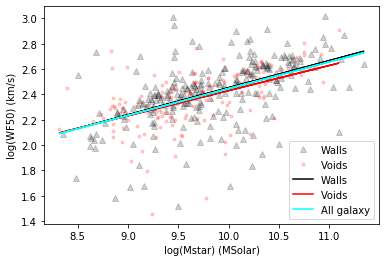

In [7]:
#Best-fit line equation for NSA_Mstar-walls galaxies given by the equation: log(WF50 velocity) = 0.21log(NSA_Mstar) + 0.31
#Best-fit line equation for NSA_Mstar-voids galaxies given by the equation: log(WF50 velocity) = 0.2log(NSA_Mstar) + 0.45
#Best-fit line equation for NSA_Mstar galaxies given by the equation: log(WF50 velocity) = 0.21log(NSA_Mstar) + 0.33

plt.plot(xdata_Mstar_walls, ydata_Mstar_walls , '^', label = 'Walls', color = 'black', alpha = 0.18)
plt.plot(xdata_Mstar_voids, ydata_Mstar_voids  , '.', label = 'Voids', color = 'red', alpha = 0.18)
plt.plot(xdata_Mstar_walls, ydata_Mstar_walls_line , '-', color = 'black', label = 'Walls')
plt.plot(xdata_Mstar_voids, ydata_Mstar_voids_line , '-', color = 'red', label = 'Voids')
plt.plot(xdata_Mstar_all, ydata_Mstar_all_line, '-', color = 'cyan', label = 'All galaxy')
plt.ylabel('log(WF50) (km/s)')
plt.xlabel('log(Mstar) (MSolar)')
plt.legend()
plt.savefig('plots/logWF50_corrected-logMstar_bestFit.svg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='svg', pad_inches=0.1)
plt.savefig('plots/logWF50_corrected-logMstar_bestFit.jpeg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='jpeg', pad_inches=0.1)

plt.show()

##### WF50 vs HI

In [8]:
# Masking outlier points
mangaVoids_plot_boolean = np.log10(mangaHIall_voids['HI-voids']) >= 8.6
mangaVoids_plot = mangaHIall_voids[mangaVoids_plot_boolean]

In [9]:
ydata_HI_walls = np.log10(mangaHIall_walls['WF50_corrected'])
ydata_HI_voids = np.log10(mangaVoids_plot['WF50_corrected'])
ydata_HI_all = np.log10(mangaHIall['WF50_corrected'])

xdata_HI_walls = np.log10(mangaHIall_walls['HI-walls'])
xdata_HI_voids = np.log10(mangaVoids_plot['HI-voids'])
xdata_HI_all = np.log10(mangaHIall['HI'])

In [10]:
ydata_HI_walls_line = linear_bestfit(mangaHIall, 'HI','walls')
ydata_HI_voids_line = linear_bestfit(mangaVoids_plot,'HI', 'voids')
ydata_HI_all_line = linear_bestfit(mangaHIall,'HI', 'all')

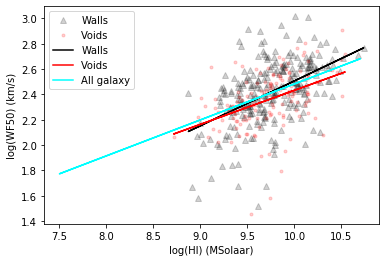

In [11]:
#Best-fit line equation for HI-walls galaxies given by the equation: log(WF50 velocity) = 0.35log(HI) + -1.03
#Best-fit line equation for HI-voids galaxies given by the equation: log(WF50 velocity) = 0.27log(HI) + -0.25
#Best-fit line equation for HI galaxies given by the equation: log(WF50 velocity) = 0.28log(HI) + -0.36

plt.plot(xdata_HI_walls, ydata_HI_walls , '^', label = 'Walls', color = 'black', alpha = 0.18)
plt.plot(xdata_HI_voids, ydata_HI_voids  , '.', label = 'Voids', color = 'red', alpha = 0.18)
plt.plot(xdata_HI_walls, ydata_HI_walls_line , '-', color = 'black', label = 'Walls')
plt.plot(xdata_HI_voids, ydata_HI_voids_line , '-', color = 'red', label = 'Voids')
plt.plot(xdata_HI_all, ydata_HI_all_line, '-', color = 'cyan', label = 'All galaxy')
plt.ylabel('log(WF50) (km/s)')
plt.xlabel('log(HI) (MSolaar)')
plt.legend()
plt.savefig('plots/logWF50_corrected-logHI_bestFit.svg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='svg', pad_inches=0.1)
plt.savefig('plots/logWF50_corrected-logHI_bestFit.jpeg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='jpeg', pad_inches=0.1)

plt.show()

##### WF50 vs (NSA_Mstar + HI)

In [12]:
mangaHIall['MHI_Mstar'] = np.NaN * np.ones(len(mangaHIall), dtype = np.float64)
mangaHIall['MHI_Mstar-walls'] = np.NaN * np.ones(len(mangaHIall), dtype = np.float64)
mangaHIall['MHI_Mstar-voids'] = np.NaN * np.ones(len(mangaHIall), dtype = np.float64)

mangaHIall['MHI_Mstar'] = mangaHIall['HI_corrected'] + mangaHIall['NSA_Mstar']
mangaHIall['MHI_Mstar-walls'] = mangaHIall['HI-walls'] + mangaHIall['NSA_Mstar-walls']
mangaHIall['MHI_Mstar-voids'] = mangaHIall['HI-voids'] + mangaHIall['NSA_Mstar-voids']

mangaHIall.write('input/mangaHIall_classified_corrected_with_Mstar+MHI', format = 'ascii.commented_header', overwrite = True)

In [13]:
MHI_Mstar_walls_boolean = np.isfinite(mangaHIall['MHI_Mstar-walls'])
mangaHIall_walls = mangaHIall[MHI_Mstar_walls_boolean]
mangaHIall_walls.remove_column('MHI_Mstar-voids')

mangaHIall_walls.write('input/mangaHIall_walls_corrected_with_Mstar+MHI.txt', format = 'ascii.commented_header',
                      overwrite = True)

In [14]:
MHI_Mstar_voids_boolean = np.isfinite(mangaHIall['MHI_Mstar-voids'])
mangaHIall_voids = mangaHIall[MHI_Mstar_voids_boolean]
mangaHIall_voids.remove_column('MHI_Mstar-walls')

mangaHIall_voids.write('input/mangaHIall_voids_corrected_with_Mstar+MHI.txt', format = 'ascii.commented_header', 
                      overwrite = True)

In [15]:
ydata_Mstar_HI_walls = np.log10(mangaHIall_walls['WF50_corrected'])
ydata_Mstar_HI_voids = np.log10(mangaHIall_voids['WF50_corrected'])
ydata_Mstar_HI_all = np.log10(mangaHIall['WF50_corrected'])

xdata_Mstar_HI_walls = np.log10(mangaHIall_walls['MHI_Mstar-walls'])
xdata_Mstar_HI_voids = np.log10(mangaHIall_voids['MHI_Mstar-voids'])
xdata_Mstar_HI_all = np.log10(mangaHIall['MHI_Mstar'])

In [16]:
ydata_Mstar_HI_walls_line = linear_bestfit(mangaHIall, 'MHI_Mstar','walls')
ydata_Mstar_HI_voids_line = linear_bestfit(mangaHIall,'MHI_Mstar', 'voids')
ydata_Mstar_HI_all_line = linear_bestfit(mangaHIall,'MHI_Mstar', 'all')

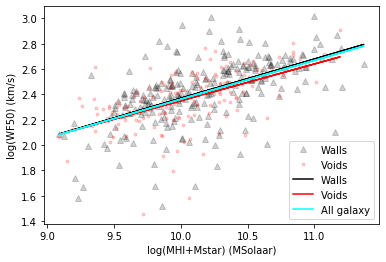

In [17]:
#Best-fit line equation for MHI_Mstar-walls galaxies given by the equation: log(WF50 velocity) = 0.31log(MHI_Mstar) + -0.73
#Best-fit line equation for MHI_Mstar-voids galaxies given by the equation: log(WF50 velocity) = 0.29log(MHI_Mstar) + -0.56
#Best-fit line equation for MHI_Mstar galaxies given by the equation: log(WF50 velocity) = 0.31log(MHI_Mstar) + -0.7

plt.plot(xdata_Mstar_HI_walls, ydata_Mstar_HI_walls , '^', label = 'Walls', color = 'black', alpha = 0.18)
plt.plot(xdata_Mstar_HI_voids, ydata_Mstar_HI_voids  , '.', label = 'Voids', color = 'red', alpha = 0.18)
plt.plot(xdata_Mstar_HI_walls, ydata_Mstar_HI_walls_line , '-', color = 'black', label = 'Walls')
plt.plot(xdata_Mstar_HI_voids, ydata_Mstar_HI_voids_line , '-', color = 'red', label = 'Voids')
plt.plot(xdata_Mstar_HI_all, ydata_Mstar_HI_all_line, '-', color = 'cyan', label = 'All galaxy')
plt.ylabel('log(WF50) (km/s)')
plt.xlabel('log(MHI+Mstar) (MSolaar)')
plt.legend()
plt.savefig('plots/logWF50_corrected-logMHI_MSTAR_bestFit.svg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='svg', pad_inches=0.1)
plt.savefig('plots/logWF50_corrected-logMHI_MSTAR_bestFit.jpeg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='jpeg', pad_inches=0.1)

plt.show()


---

### Median plots and fits

##### WF50 vs MStar